<a href="https://colab.research.google.com/github/sofiagpmg/Detecting-Cyberbully/blob/main/Bert_with_5_%2B_LR_3e_5_epochs_29042021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install textfeatures

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import torch
import pandas as pd
import numpy as np
import textfeatures as tf

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df=pd.read_csv("/content/drive/MyDrive/BERT_ICD10 classification/mtsamples_ICD10_v2_24042021.csv")

In [98]:
df.head()

id  ...                         ICD_Chapter
0  PAT001  ...  Diseases of the respiratory system
1  PAT002  ...  Diseases of the respiratory system
2  PAT003  ...  Diseases of the respiratory system
3  PAT004  ...  Diseases of the respiratory system
4  PAT005  ...  Diseases of the respiratory system

[5 rows x 7 columns]

In [99]:
df.isna().sum()

id                      0
Description             0
Medical_specialty       0
Sample_name             0
Transcription          33
Keywords             1067
ICD_Chapter             0
dtype: int64

In [100]:
 # to replace the missing rows in transcript with description column
 df['Transcription1'] = df['Transcription'].fillna(df['Description'])

In [101]:
df = df.drop(['Transcription'], axis = 1)

In [102]:
df.columns

Index(['id', 'Description', 'Medical_specialty', 'Sample_name', 'Keywords',
       'ICD_Chapter', 'Transcription1'],
      dtype='object')

In [103]:
df = df.drop(['Medical_specialty','Description','Sample_name','Keywords'], axis = 1)

In [104]:
df = df.rename(columns={'Transcription1': 'Transcription'})

In [105]:
# Calculate the word count in every row of the dataset
tf.word_count(df,"Transcription","word_cnt")
df[["Transcription","word_cnt"]].head()

Transcription  word_cnt
0  SUBJECTIVE:,  This 23-year-old white female pr...       226
1  HISTORY: , A 34-year-old male presents today s...       683
2  CHIEF COMPLAINT: , This 5-year-old male presen...       426
3  HISTORY:,  I had the pleasure of meeting and e...       840
4  HISTORY:,  A 55-year-old female presents self-...       154

In [106]:
# Calculate the number of characters in every row of the dataset.
tf.char_count(df,"Transcription","char_len")
df[["Transcription","char_len"]].head()

Transcription  char_len
0  SUBJECTIVE:,  This 23-year-old white female pr...      1331
1  HISTORY: , A 34-year-old male presents today s...      4379
2  CHIEF COMPLAINT: , This 5-year-old male presen...      2781
3  HISTORY:,  I had the pleasure of meeting and e...      5338
4  HISTORY:,  A 55-year-old female presents self-...      1112

In [107]:
#find the average word length
tf.avg_word_length(df,"Transcription","avg_wrd_length")
df[["Transcription","avg_wrd_length"]].head()

Transcription  avg_wrd_length
0  SUBJECTIVE:,  This 23-year-old white female pr...        5.421569
1  HISTORY: , A 34-year-old male presents today s...        5.794671
2  CHIEF COMPLAINT: , This 5-year-old male presen...        6.041026
3  HISTORY:,  I had the pleasure of meeting and e...        5.760563
4  HISTORY:,  A 55-year-old female presents self-...        6.801418

In [108]:
# find the count of stopwords present in the text data.

In [109]:
# Count of stopwords present in the text data.
tf.stopwords_count(df,"Transcription","stopwords_cnt")
df[["Transcription","stopwords_cnt"]].head()

Transcription  stopwords_cnt
0  SUBJECTIVE:,  This 23-year-old white female pr...             75
1  HISTORY: , A 34-year-old male presents today s...            215
2  CHIEF COMPLAINT: , This 5-year-old male presen...            130
3  HISTORY:,  I had the pleasure of meeting and e...            257
4  HISTORY:,  A 55-year-old female presents self-...             39

In [110]:
#find the stopwords in the text data and store it in a list so that you can find the noise in the data and make it more interactive
tf.stopwords(df,"Transcription","stopwords")
df[["Transcription","stopwords"]].head()

Transcription                                          stopwords
0  SUBJECTIVE:,  This 23-year-old white female pr...  [with, of, to, have, when, she, in, but, she, ...
1  HISTORY: , A 34-year-old male presents today s...  [at, the, of, and, his, to, further, and, to, ...
2  CHIEF COMPLAINT: , This 5-year-old male presen...  [to, by, the, with, he, has, been, and, their,...
3  HISTORY:,  I had the pleasure of meeting and e...  [had, the, of, and, the, for, and, of, you, ar...
4  HISTORY:,  A 55-year-old female presents self-...  [for, the, of, and, of, and, to, for, and, and...

In [111]:
#calculate the count of hashtags first.
tf.hashtags_count(df,"Transcription","hashtags_count")
df[["Transcription","hashtags_count"]].head()

Transcription  hashtags_count
0  SUBJECTIVE:,  This 23-year-old white female pr...               0
1  HISTORY: , A 34-year-old male presents today s...               0
2  CHIEF COMPLAINT: , This 5-year-old male presen...               0
3  HISTORY:,  I had the pleasure of meeting and e...               0
4  HISTORY:,  A 55-year-old female presents self-...               0

In [112]:
tf.hashtags(df,"Transcription","hashtags")
df[["Transcription","hashtags"]].head()

Transcription hashtags
0  SUBJECTIVE:,  This 23-year-old white female pr...       []
1  HISTORY: , A 34-year-old male presents today s...       []
2  CHIEF COMPLAINT: , This 5-year-old male presen...       []
3  HISTORY:,  I had the pleasure of meeting and e...       []
4  HISTORY:,  A 55-year-old female presents self-...       []

In [113]:
tf.clean(df,"Transcription","Clean_Transcription")
df[["Transcription","Clean_Transcription"]].head()

Transcription                                Clean_Transcription
0  SUBJECTIVE:,  This 23-year-old white female pr...  subjective yearold white female presents compl...
1  HISTORY: , A 34-year-old male presents today s...  history yearold male presents today selfreferr...
2  CHIEF COMPLAINT: , This 5-year-old male presen...  chief complaint yearold male presents children...
3  HISTORY:,  I had the pleasure of meeting and e...  history pleasure meeting evaluating patient re...
4  HISTORY:,  A 55-year-old female presents self-...  history yearold female presents selfreferred p...

In [114]:
!pip install texthero

In [115]:
import texthero as hero

In [116]:
tw = hero.visualization.top_words(df['Clean_Transcription']).head(10)
import plotly.express as px
fig = px.bar(tw)
fig.show()
tw.head()

patient    21916
right      11129
left       10776
history     8258
placed      6966
Name: Clean_Transcription, dtype: int64

In [117]:
df.columns

Index(['id', 'ICD_Chapter', 'Transcription', 'word_cnt', 'char_len',
       'avg_wrd_length', 'stopwords_cnt', 'stopwords', 'hashtags_count',
       'hashtags', 'Clean_Transcription'],
      dtype='object')

In [118]:
df = df[['id', 'Clean_Transcription','ICD_Chapter']]

In [119]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['ICD_No'] = le.fit_transform(df.ICD_Chapter.values)

In [120]:
df.head(2)

id  ... ICD_No
0  PAT001  ...     11
1  PAT002  ...     11

[2 rows x 4 columns]

In [121]:
df['Clean_Transcription']= df['Clean_Transcription'].apply(lambda x: x.replace('patient', ''))
df['Clean_Transcription']= df['Clean_Transcription'].apply(lambda x: x.replace('time', ''))
df['Clean_Transcription']= df['Clean_Transcription'].apply(lambda x: x.replace('noted', ''))
df['Clean_Transcription']= df['Clean_Transcription'].apply(lambda x: x.replace('need', ''))
df['Clean_Transcription']= df['Clean_Transcription'].apply(lambda x: x.replace('well', ''))
df['Clean_Transcription']= df['Clean_Transcription'].apply(lambda x: x.replace('placed', ''))
df['Clean_Transcription']= df['Clean_Transcription'].apply(lambda x: x.replace('history', ''))

In [122]:
df1 = df[['ICD_Chapter','ICD_No']]
df2 = df1.drop_duplicates()

In [123]:
df2.head(30)

ICD_Chapter  ICD_No
0                   Diseases of the respiratory system      11
6    Diseases of the musculoskeletal system and con...       9
7                         External causes of morbidity      14
15   Symptoms, signs and abnormal clinical and labo...      21
19   Factors influencing health status and contact ...      15
20                    Diseases of the digestive system       5
23                  Diseases of the circulatory system       4
25        Diseases of the skin and subcutaneous tissue      12
58   Congenital malformations, deformations and chr...       2
177      Endocrine, nutritional and metabolic diseases      13
256               Diseases of the genitourinary system       8
271                                          Neoplasms      18
320           Pregnancy, childbirth and the puerperium      20
424  Injury, poisoning and certain other consequenc...      16
428  Mental, Behavioral and Neurodevelopmental diso...      17
430                     Diseases of the nervous system      10
434            Diseases of the ear and mastoid process       6
435  Diseases of the blood and blood-forming organs...       3
471          Certain infectious and parasitic diseases       1
493                     Diseases of the eye and adnexa       7
747  Certain conditions originating in the perinata...       0
772                                               None      19

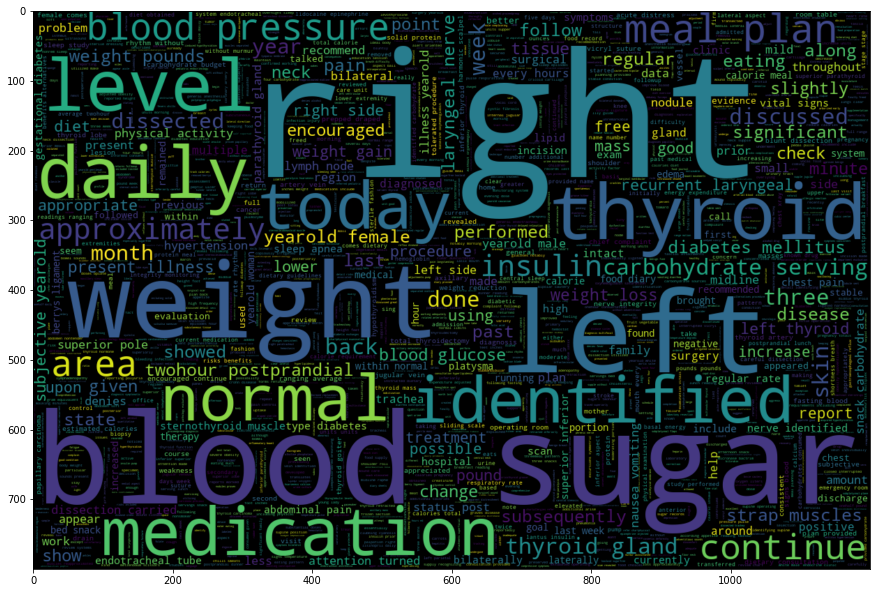

In [124]:
Endocrine = df.Clean_Transcription[df.ICD_No[df.ICD_No==13].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(Endocrine))
plt.imshow(wordcloud,interpolation = 'bilinear');

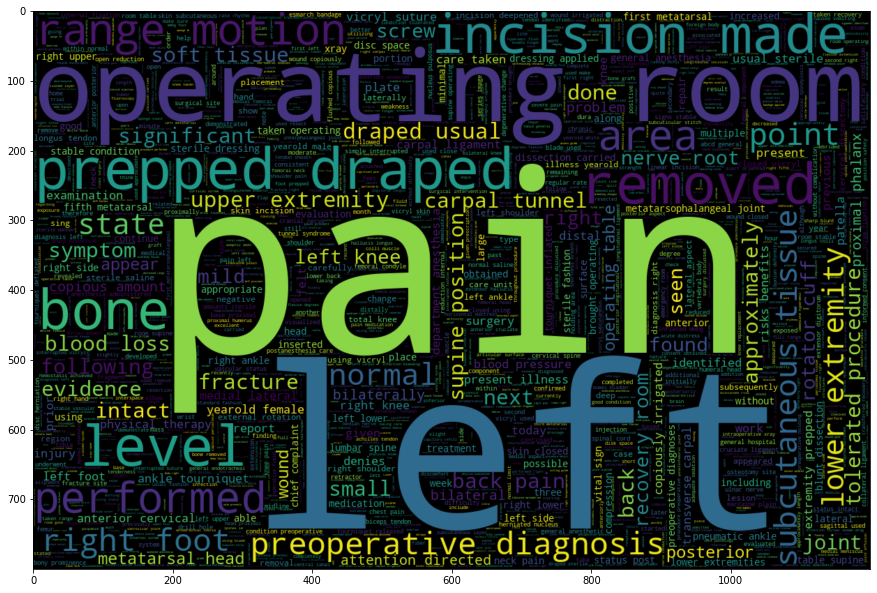

In [125]:
Musculoskeletal = df.Clean_Transcription[df.ICD_No[df.ICD_No==9].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(Musculoskeletal))
plt.imshow(wordcloud,interpolation = 'bilinear');

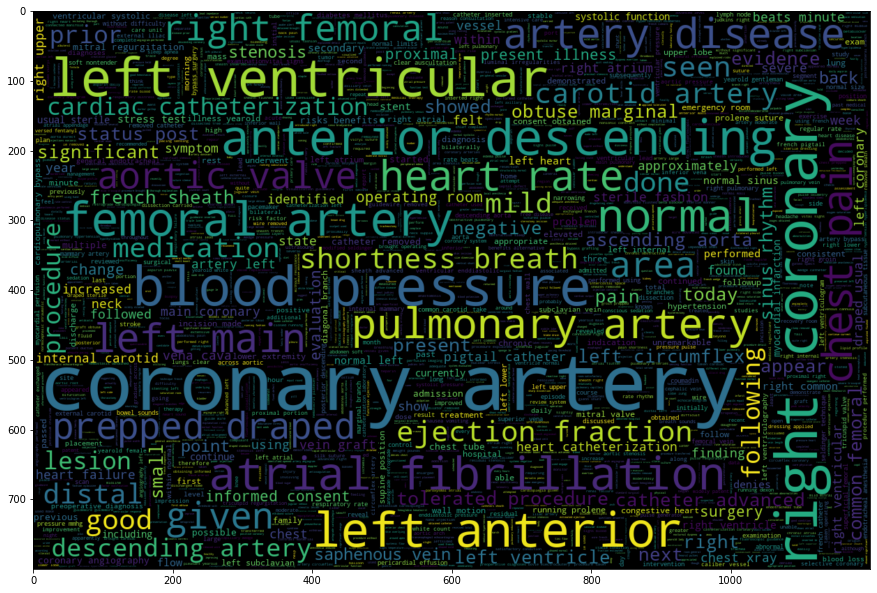

In [126]:
Circulatory = df.Clean_Transcription[df.ICD_No[df.ICD_No==4].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(Circulatory))
plt.imshow(wordcloud,interpolation = 'bilinear');

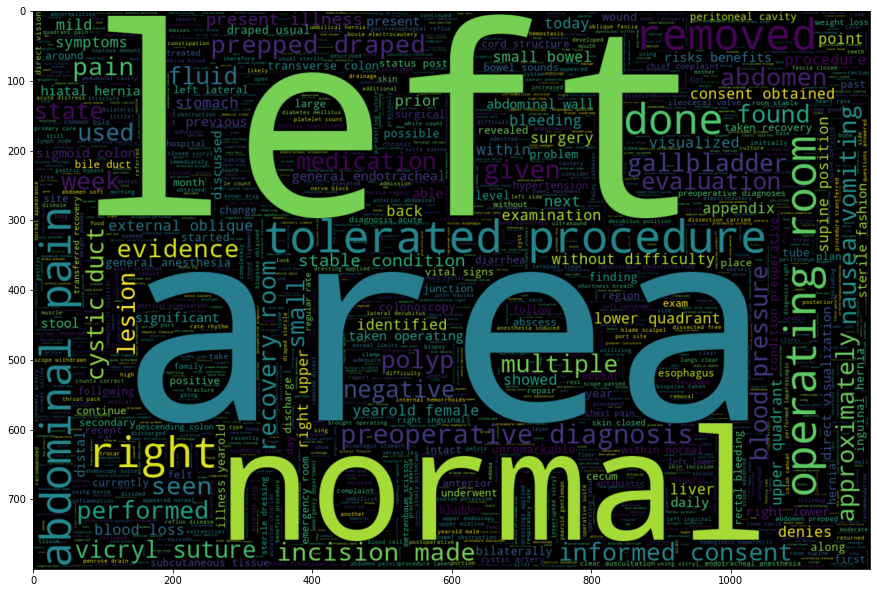

In [127]:
Digestive = df.Clean_Transcription[df.ICD_No[df.ICD_No==5].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(Digestive))
plt.imshow(wordcloud,interpolation = 'bilinear');

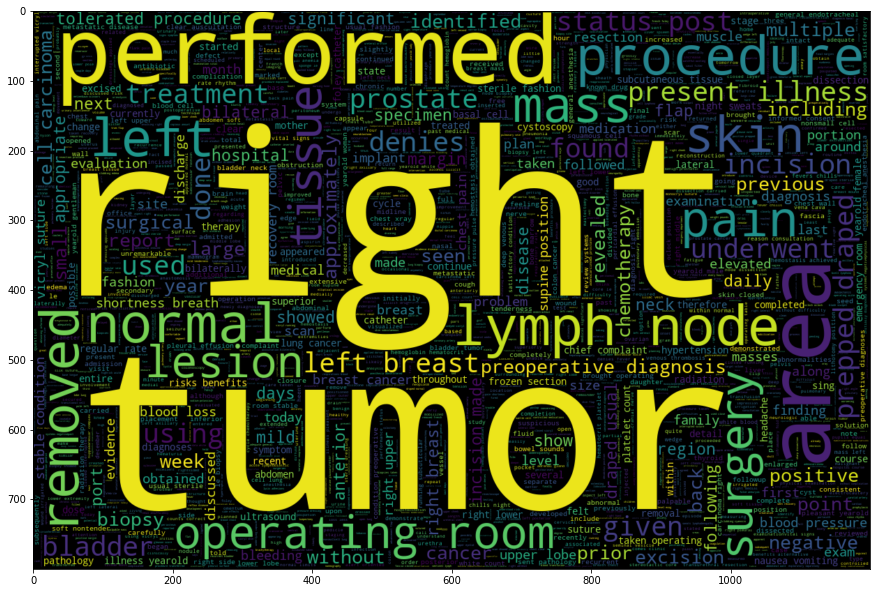

In [128]:
Neoplasms = df.Clean_Transcription[df.ICD_No[df.ICD_No==18].index]
plt.figure(figsize = (15,20)) ;
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(Neoplasms))
plt.imshow(wordcloud,interpolation = 'bilinear');

In [129]:
df.set_index('id', inplace=True)

In [130]:
df2 = df.rename(columns = {'Clean_Transcription': 'text', 'ICD_Chapter': 'category'}, inplace = False)
df2.head(3)


text  ... ICD_No
id                                                         ...       
PAT001  subjective yearold white female presents compl...  ...     11
PAT002   yearold male presents today selfreferred reco...  ...     11
PAT003  chief complaint yearold male presents children...  ...     11

[3 rows x 3 columns]

In [131]:
df2 = df2[['text', 'category']]
df2.head(3)

text                            category
id                                                                                           
PAT001  subjective yearold white female presents compl...  Diseases of the respiratory system
PAT002   yearold male presents today selfreferred reco...  Diseases of the respiratory system
PAT003  chief complaint yearold male presents children...  Diseases of the respiratory system

In [132]:
possible_labels = df2.category.unique()

In [133]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [134]:
df2['label'] = df2.category.replace(label_dict)

In [135]:
df2.head(2)

text  ... label
id                                                         ...      
PAT001  subjective yearold white female presents compl...  ...     0
PAT002   yearold male presents today selfreferred reco...  ...     0

[2 rows x 3 columns]

In [136]:
#Training and Validation Split

from sklearn.model_selection import train_test_split

In [137]:
X_train, X_val, y_train, y_val = train_test_split(df2.index.values, 
                                                  df2.label.values, 
                                                  test_size=0.15, 
                                                  random_state=17, 
                                                  stratify=df2.label.values)

In [138]:
df2['data_type'] = ['not_set']*df2.shape[0]

In [139]:
df2.loc[X_train, 'data_type'] = 'train'
df2.loc[X_val, 'data_type'] = 'val'

In [140]:
df2.groupby(['category', 'label', 'data_type']).count()

text
category                                           label data_type      
Certain conditions originating in the perinatal... 20    train        62
                                                         val          11
Certain infectious and parasitic diseases          18    train        44
                                                         val           8
Congenital malformations, deformations and chro... 8     train        36
                                                         val           6
Diseases of the blood and blood-forming organs ... 17    train        28
                                                         val           5
Diseases of the circulatory system                 6     train       527
                                                         val          93
Diseases of the digestive system                   5     train       499
                                                         val          88
Diseases of the ear and mastoid process            16    train        36
                                                         val           6
Diseases of the eye and adnexa                     19    train       139
                                                         val          25
Diseases of the genitourinary system               10    train       320
                                                         val          57
Diseases of the musculoskeletal system and conn... 1     train       758
                                                         val         134
Diseases of the nervous system                     15    train       551
                                                         val          97
Diseases of the respiratory system                 0     train       274
                                                         val          48
Diseases of the skin and subcutaneous tissue       7     train        72
                                                         val          13
Endocrine, nutritional and metabolic diseases      9     train        81
                                                         val          14
External causes of morbidity                       2     train        11
                                                         val           2
Factors influencing health status and contact w... 4     train        45
                                                         val           8
Injury, poisoning and certain other consequence... 13    train        65
                                                         val          11
Mental, Behavioral and Neurodevelopmental disor... 14    train        94
                                                         val          17
Neoplasms                                          11    train       250
                                                         val          44
None                                               21    train        68
                                                         val          12
Pregnancy, childbirth and the puerperium           12    train       199
                                                         val          35
Symptoms, signs and abnormal clinical and labor... 3     train        90
                                                         val          16

In [141]:
!pip install transformers

In [142]:
!pip install sentencepiece

In [143]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [144]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [145]:
!pip install torch

In [146]:
!pip install pytorch-pretrained-bert

In [147]:
encoded_data_train = tokenizer.batch_encode_plus(
    df2[df2.data_type=='train'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df2[df2.data_type=='val'].text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df2[df2.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df2[df2.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [148]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [149]:
from transformers import BertForSequenceClassification

In [150]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [151]:
#Creating data loader
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

In [152]:
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [153]:
from transformers import AdamW, get_linear_schedule_with_warmup


optimizer = AdamW(model.parameters(),
                  lr=3e-5, 
                  eps=1e-8)

In [154]:
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [155]:
#Defining our Performance Metrics

In [156]:
from sklearn.metrics import f1_score

In [157]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [158]:
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [159]:
##Creating our Training Loop
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [160]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [161]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [162]:
from tqdm.notebook import tqdm

In [163]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


Epoch 1
Training loss: 2.1833448248698297
Validation loss: 1.6459000706672668
F1 Score (Weighted): 0.5027837062629165



Epoch 2
Training loss: 1.4054668007936693
Validation loss: 1.3846110254526138
F1 Score (Weighted): 0.607960144644295



Epoch 3
Training loss: 1.143252808796732
Validation loss: 1.2876166279117267
F1 Score (Weighted): 0.6302631003552865



Epoch 4
Training loss: 0.9979576688063773
Validation loss: 1.299153357744217
F1 Score (Weighted): 0.6324290010100637



Epoch 5
Training loss: 0.909407557401442
Validation loss: 1.2839865560332935
F1 Score (Weighted): 0.6342472606659963



In [164]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [165]:
accuracy_per_class(predictions, true_vals)

Class: Diseases of the respiratory system
Accuracy: 39/48

Class: Diseases of the musculoskeletal system and connective tissue
Accuracy: 105/134

Class: External causes of morbidity
Accuracy: 0/2

Class: Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
Accuracy: 1/16

Class: Factors influencing health status and contact with health services
Accuracy: 0/8

Class: Diseases of the digestive system
Accuracy: 77/88

Class: Diseases of the circulatory system
Accuracy: 66/93

Class: Diseases of the skin and subcutaneous tissue
Accuracy: 5/13

Class: Congenital malformations, deformations and chromosomal abnormalities
Accuracy: 1/6

Class: Endocrine, nutritional and metabolic diseases
Accuracy: 11/14

Class: Diseases of the genitourinary system
Accuracy: 33/57

Class: Neoplasms
Accuracy: 27/44

Class: Pregnancy, childbirth and the puerperium
Accuracy: 21/35

Class: Injury, poisoning and certain other consequences of external causes
Accuracy: 0/11

Class: 

In [166]:
from sklearn.metrics import f1_score, accuracy_score, classification_report


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = evaluate(dataloader_validation)


In [167]:
model_outputs

array([[ 4.3002048 , -1.7437431 , -0.6219304 , ..., -0.32634494,
         1.0979806 ,  0.97291195],
       [-1.321039  ,  1.3133469 ,  0.5054733 , ..., -1.3424501 ,
         0.8203665 ,  1.8932006 ],
       [-0.17798911,  0.04165367, -0.78806084, ..., -1.4375172 ,
        -0.00502933, -0.8831588 ],
       ...,
       [-0.46565846, -0.83937824, -1.021101  , ..., -0.24449545,
        -1.3328317 , -2.0300255 ],
       [-1.1947654 , -0.10337801, -0.44238254, ..., -1.1062719 ,
        -0.5173621 , -0.7219334 ],
       [-0.38836154,  3.886566  , -0.876925  , ..., -1.0593243 ,
        -0.09614588, -0.19007614]], dtype=float32)

In [168]:
def cr_func(preds, labels):
  preds_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return classification_report(labels_flat, preds_flat,sorted(possible_labels))

#predictions = []
#for x in model_outputs:
#    predictions.append(np.argmax(x))

#print('f1 score:', f1_score(eval_df['label'], predictions,average='micro'))

#target_names = ['class 0', 'class 1', 'class 2']
print(cr_func(labels_flat, preds_flat,sorted(possible_labels)))#,target_names=sorted(df['label'].unique())))

NameError: ignored

In [ ]:
print(classification_report(labels_flat, preds_flat,sorted(possible_labels)))

In [ ]:
# Evaluation Function

def evaluate(model, dataloader_val):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for (labels, title, text, titletext), _ in dataloader_val:

                labels = labels.type(torch.LongTensor)           
                labels = labels.to(device)
                titletext = titletext.type(torch.LongTensor)  
                titletext = titletext.to(device)
                output = model(titletext, labels)

                _, output = output
                y_pred.extend(torch.argmax(output, 1).tolist())
                y_true.extend(labels.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
    ax.yaxis.set_ticklabels(['FAKE', 'REAL'])
    
best_model = model().to(device)

load_checkpoint(destination_folder + '/model.pt', best_model)

evaluate(best_model, test_iter)

In [ ]:
dataset_val